In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('listings_50_sin_nulos.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10452 entries, 0 to 10451
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  10452 non-null  int64  
 1   Unnamed: 0                                    10452 non-null  int64  
 2   id                                            10452 non-null  int64  
 3   last_scraped                                  10452 non-null  object 
 4   host_id                                       10452 non-null  int64  
 5   host_name                                     10452 non-null  object 
 6   host_since                                    10452 non-null  object 
 7   host_location                                 10452 non-null  object 
 8   host_response_time                            10452 non-null  object 
 9   host_response_rate                            10452 non-null 

In [4]:
cualitativas = data.iloc[:, [0]]
cuantitativas=data.iloc[:, [19,21,22,30,31,41,42,43,44,45,51]]

<Figure size 1500x800 with 0 Axes>

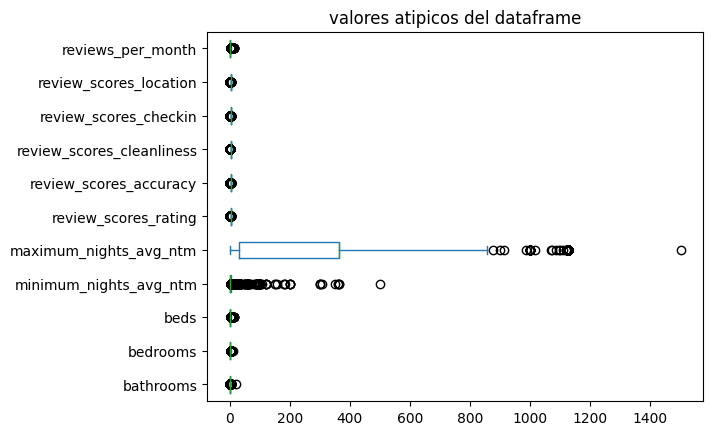

In [5]:
fig= plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box',vert=False)
plt.title('valores atipicos del dataframe')
plt.show() 

In [6]:
y=cuantitativas
limite_superior = y.mean() + 3 * y.std()
limite_inferior = y.mean() - 3 * y.std()
print( "limite superiro permitido", limite_superior)
print( "limite inferior permitido", limite_inferior)

limite superiro permitido bathrooms                       2.734979
bedrooms                        4.429031
beds                            5.678027
minimum_nights_avg_ntm         46.591845
maximum_nights_avg_ntm       1591.631778
review_scores_rating            9.735195
review_scores_accuracy          9.762553
review_scores_cleanliness       9.612520
review_scores_checkin           9.760493
review_scores_location          9.729647
reviews_per_month               6.115523
dtype: float64
limite inferior permitido bathrooms                     -0.942786
bedrooms                      -1.307906
beds                          -2.725099
minimum_nights_avg_ntm       -37.987731
maximum_nights_avg_ntm      -843.277913
review_scores_rating          -2.010279
review_scores_accuracy        -2.013925
review_scores_cleanliness     -2.008954
review_scores_checkin         -2.009620
review_scores_location        -1.997165
reviews_per_month             -3.422718
dtype: float64


In [7]:
data2=cuantitativas[(y<=limite_superior)&(y>=limite_inferior)]
data2

,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month
0,0.0,3.0,0.0,7.0,14.0,5.00,5.00,4.00,5.00,5.00,0.53
1,1.0,2.0,3.0,4.0,1000.0,4.91,4.96,4.98,4.92,4.96,0.40
2,1.0,1.0,2.0,14.0,730.0,4.75,4.69,4.78,4.98,4.71,0.34
3,0.0,2.0,0.0,3.0,1125.0,4.77,4.78,4.58,4.74,4.49,0.50
4,0.0,0.0,0.0,1.0,40.0,4.82,4.85,4.72,4.85,4.60,1.46
...,...,...,...,...,...,...,...,...,...,...,...
10447,1.0,1.0,2.0,1.0,20.0,0.00,0.00,0.00,0.00,0.00,1.00
10448,1.0,1.0,1.0,28.0,365.0,0.00,0.00,0.00,0.00,0.00,1.00
10449,1.0,1.0,1.0,1.0,14.0,0.00,0.00,0.00,0.00,0.00,1.00
10450,1.0,1.0,1.0,1.0,365.0,0.00,0.00,0.00,0.00,0.00,1.00


In [8]:
valores_nulos=data2.isnull().sum()
valores_nulos

bathrooms                     65
bedrooms                      92
beds                         171
minimum_nights_avg_ntm        76
maximum_nights_avg_ntm         0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_location         0
reviews_per_month            224
dtype: int64

In [9]:
data_clean=data2.copy()
data_clean.fillna(round(data2.mean(),1))
data_clean

,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month
0,0.0,3.0,0.0,7.0,14.0,5.00,5.00,4.00,5.00,5.00,0.53
1,1.0,2.0,3.0,4.0,1000.0,4.91,4.96,4.98,4.92,4.96,0.40
2,1.0,1.0,2.0,14.0,730.0,4.75,4.69,4.78,4.98,4.71,0.34
3,0.0,2.0,0.0,3.0,1125.0,4.77,4.78,4.58,4.74,4.49,0.50
4,0.0,0.0,0.0,1.0,40.0,4.82,4.85,4.72,4.85,4.60,1.46
...,...,...,...,...,...,...,...,...,...,...,...
10447,1.0,1.0,2.0,1.0,20.0,0.00,0.00,0.00,0.00,0.00,1.00
10448,1.0,1.0,1.0,28.0,365.0,0.00,0.00,0.00,0.00,0.00,1.00
10449,1.0,1.0,1.0,1.0,14.0,0.00,0.00,0.00,0.00,0.00,1.00
10450,1.0,1.0,1.0,1.0,365.0,0.00,0.00,0.00,0.00,0.00,1.00


In [10]:
y=cuantitativas 

percentile25=y.quantile(0.25)   
percentile75=y.quantile(0.75)
iqr= percentile75-percentile25

limite_superior_iqr=percentile75+1.5*iqr
limite_inferior_iqr=percentile25-1.5*iqr
print("limite superior permitido", limite_superior_iqr)
print("limite inferior permitido", limite_inferior_iqr)

limite superior permitido bathrooms                      1.000
bedrooms                       3.500
beds                           3.500
minimum_nights_avg_ntm         5.500
maximum_nights_avg_ntm       867.500
review_scores_rating           5.840
review_scores_accuracy         5.750
review_scores_cleanliness      6.290
review_scores_checkin          5.750
review_scores_location         5.750
reviews_per_month              3.765
dtype: float64
limite inferior permitido bathrooms                      1.000
bedrooms                      -0.500
beds                          -0.500
minimum_nights_avg_ntm        -0.100
maximum_nights_avg_ntm      -472.500
review_scores_rating           3.600
review_scores_accuracy         3.750
review_scores_cleanliness      2.850
review_scores_checkin          3.750
review_scores_location         3.750
reviews_per_month             -1.715
dtype: float64


In [11]:
data3_iqr=cuantitativas[(y<=limite_superior_iqr)&(y>=limite_inferior_iqr)]  
data3_iqr

,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month
0,NaN,3.0,0.0,NaN,14.0,5.00,5.00,4.00,5.00,5.00,0.53
1,1.0,2.0,3.0,4.0,NaN,4.91,4.96,4.98,4.92,4.96,0.40
2,1.0,1.0,2.0,NaN,730.0,4.75,4.69,4.78,4.98,4.71,0.34
3,NaN,2.0,0.0,3.0,NaN,4.77,4.78,4.58,4.74,4.49,0.50
4,NaN,0.0,0.0,1.0,40.0,4.82,4.85,4.72,4.85,4.60,1.46
...,...,...,...,...,...,...,...,...,...,...,...
10447,1.0,1.0,2.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,1.00
10448,1.0,1.0,1.0,NaN,365.0,NaN,NaN,NaN,NaN,NaN,1.00
10449,1.0,1.0,1.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,1.00
10450,1.0,1.0,1.0,1.0,365.0,NaN,NaN,NaN,NaN,NaN,1.00


In [12]:
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

bathrooms                    3554
bedrooms                      470
beds                          848
minimum_nights_avg_ntm       1156
maximum_nights_avg_ntm       2070
review_scores_rating         2170
review_scores_accuracy       2187
review_scores_cleanliness    2134
review_scores_checkin        2168
review_scores_location       2143
reviews_per_month             795
dtype: int64

In [13]:
data4_iqr=data3_iqr.copy()
data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month
0,NaN,3.0,0.0,NaN,14.0,5.00,5.00,4.00,5.00,5.00,0.53
1,1.0,2.0,3.0,4.0,NaN,4.91,4.96,4.98,4.92,4.96,0.40
2,1.0,1.0,2.0,NaN,730.0,4.75,4.69,4.78,4.98,4.71,0.34
3,NaN,2.0,0.0,3.0,NaN,4.77,4.78,4.58,4.74,4.49,0.50
4,NaN,0.0,0.0,1.0,40.0,4.82,4.85,4.72,4.85,4.60,1.46
...,...,...,...,...,...,...,...,...,...,...,...
10447,1.0,1.0,2.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,1.00
10448,1.0,1.0,1.0,NaN,365.0,NaN,NaN,NaN,NaN,NaN,1.00
10449,1.0,1.0,1.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,1.00
10450,1.0,1.0,1.0,1.0,365.0,NaN,NaN,NaN,NaN,NaN,1.00


In [14]:
datos_limpios=pd.concat([cualitativas,data4_iqr],axis=1)    
datos_limpios

,Unnamed: 0.1,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month
0,0,NaN,3.0,0.0,NaN,14.0,5.00,5.00,4.00,5.00,5.00,0.53
1,1,1.0,2.0,3.0,4.0,NaN,4.91,4.96,4.98,4.92,4.96,0.40
2,2,1.0,1.0,2.0,NaN,730.0,4.75,4.69,4.78,4.98,4.71,0.34
3,3,NaN,2.0,0.0,3.0,NaN,4.77,4.78,4.58,4.74,4.49,0.50
4,4,NaN,0.0,0.0,1.0,40.0,4.82,4.85,4.72,4.85,4.60,1.46
...,...,...,...,...,...,...,...,...,...,...,...,...
10447,10447,1.0,1.0,2.0,1.0,20.0,NaN,NaN,NaN,NaN,NaN,1.00
10448,10448,1.0,1.0,1.0,NaN,365.0,NaN,NaN,NaN,NaN,NaN,1.00
10449,10449,1.0,1.0,1.0,1.0,14.0,NaN,NaN,NaN,NaN,NaN,1.00
10450,10450,1.0,1.0,1.0,1.0,365.0,NaN,NaN,NaN,NaN,NaN,1.00


In [ ]:
datos_limpios.to_csv('listings_50_sin_nulos_outliers.csv')